In [2]:
import numpy as np 
import pandas as pd 
import numpy as np 
import pandas as pd
import xarray as xr
import openpyxl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import *
import matplotlib.colors as colors
from scipy import stats 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point


In [3]:
iyr=2000
fyr=2023
domain='GRa'
domainO='MARMer'
variable='pr'
var='pr'
units='mm/month'
exp='obs'

model1='MAR'
res1='5x5km'

model2='chirps'
res2='0.05°x0.05°'

model3='cru'

model4='aphro'
res4=str('0.25°x0.25°')

model5='gpcp'
res5=str('1.0°x1.0°')

model6='era5-land'

model7='era5'


titles = {
    'MAM': 'MAM',
    'JJAS': 'JJAS',
    'ON': 'ON',
    'DJF': 'DJF',
}

station='Changri'


In [4]:
## GRID Model MAR
sourceDataGrid='/home/amoryc/'
#fileName_grF='NST.2000.01.01.00.GRa_Fedchenko.nc'
fileName_grM='NST.2000.01.01.00.GRa_Mera.nc_ICEmask'
ds_grM= xr.open_dataset(sourceDataGrid+fileName_grM)

In [5]:
sourceData='/bettik/PROJECTS/pr-regional-climate/santolam/'
sourceData2='/bettik/PROJECTS/pr-regional-climate/fainx/'

In [6]:
####
## MAR
####
sourceData1='/bettik/PROJECTS/pr-regional-climate/santolam/MARout/GRa/spin2/work/monthly/'
variable='TTZ' ##RF;SF;SHSN3;TT
fileName1='TTZ_mon_MARv3.14_ER5_spin2_GRa_2000-2023.nc' ##change to monthly
dsM= xr.open_dataset(sourceData1+fileName1)['TTZ'][:,1,:,:] ## montlhy mean
FieldMAR = dsM.rename({'TIME': 'time'})

In [7]:
####
## CRU
####

res3=str('0.5°x0.5°')

fileName4='cru_ts4.05.1901.2020.tmp.dat_remapMARMer.nc'
ds3 = xr.open_dataset(sourceData+model3+'/'+fileName4)['tmp']
print(ds3.attrs)
FieldCRU=ds3.sel(time=slice(str(iyr)+'-01',str(fyr)+'-12'))
#units in mm/month -> mm/day
#field50=dom.field_dom(ds5,domain)
#month_length5 = field50.time.dt.days_in_month
#
#field5=field50/month_length5

FieldCRU=FieldCRU.rename({'lat': 'lat3'})
FieldCRU=FieldCRU.rename({'lon': 'lon3'})

{'long_name': 'near-surface temperature', 'units': 'degrees Celsius', 'correlation_decay_distance': np.float32(1200.0)}


In [8]:
######
## ERA-5 LAND
######

fileName6='era5-land_t2m_remap_GRa.nc'
ds6 = xr.open_dataset(sourceData2+model6+'/'+fileName6)['t2m']
print(ds6.attrs)
FieldERALAND=ds6.sel(valid_time=slice(str(iyr)+'-01',str(fyr)+'-12'))
#units in mm/month -> mm/day
#field50=dom.field_dom(ds5,domain)
#month_length5 = field50.time.dt.days_in_month
#
#field5=field50/month_length5
FieldERALAND=FieldERALAND.rename({'valid_time': 'time'})
FieldERALAND=FieldERALAND.rename({'lat': 'lat6'})
FieldERALAND=FieldERALAND.rename({'lon': 'lon6'})
FieldERALAND




{'standard_name': 'unknown', 'long_name': '2 metre temperature', 'units': 'K', 'GRIB_paramId': np.int32(167), 'GRIB_dataType': 'fc', 'GRIB_numberOfPoints': np.int32(6161), 'GRIB_typeOfLevel': 'surface', 'GRIB_stepUnits': np.int32(1), 'GRIB_gridType': 'regular_ll', 'GRIB_uvRelativeToGrid': np.int32(0), 'GRIB_NV': np.int32(0), 'GRIB_Nx': np.int32(101), 'GRIB_Ny': np.int32(61), 'GRIB_cfName': 'unknown', 'GRIB_cfVarName': 't2m', 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid', 'GRIB_iDirectionIncrementInDegrees': np.float64(0.1), 'GRIB_iScansNegatively': np.int32(0), 'GRIB_jDirectionIncrementInDegrees': np.float64(0.1), 'GRIB_jPointsAreConsecutive': np.int32(0), 'GRIB_jScansPositively': np.int32(0), 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(31.0), 'GRIB_latitudeOfLastGridPointInDegrees': np.float64(25.0), 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(81.0), 'GRIB_longitudeOfLastGridPointInDegrees': np.float64(91.0), 'GRIB_missingValue': np.float64(3.402823466

<xarray.DataArray 't2m' (time: 288, y: 116, x: 164)> Size: 22MB
[5478912 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2kB 2000-01-01 2000-02-01 ... 2023-12-01
    lon6     (y, x) float32 76kB ...
    lat6     (y, x) float32 76kB ...
  * x        (x) float32 656B -495.0 -490.0 -485.0 -480.0 ... 310.0 315.0 320.0
  * y        (y) float32 464B -195.0 -190.0 -185.0 -180.0 ... 370.0 375.0 380.0
Attributes: (12/31)
    standard_name:                            unknown
    long_name:                                2 metre temperature
    units:                                    K
    GRIB_paramId:                             167
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      6161
    ...                                       ...
    GRIB_missingValue:                        3.4028234663852886e+38
    GRIB_name:                                2 metre temperature
    GRIB_shortName:                           2t
    GRIB_totalNumber:                         0
    GRIB_units:                               K
    GRIB_surface:                             0.0

In [9]:
######
## ERA-5 
######

fileName7='era5_GRa_t2m_remap_GRa.nc'
ds7 = xr.open_dataset(sourceData2+model7+'/'+fileName7)['t2m']
print(ds7.attrs)
FieldERA_5=ds7.sel(valid_time=slice(str(iyr)+'-01',str(fyr)+'-12'))
#units in mm/month -> mm/day
#field50=dom.field_dom(ds5,domain)
#month_length5 = field50.time.dt.days_in_month
#
#field5=field50/month_length5
FieldERA_5=FieldERA_5.rename({'valid_time': 'time'})
FieldERA_5=FieldERA_5.rename({'lat': 'lat7'})
FieldERA_5=FieldERA_5.rename({'lon': 'lon7'})
FieldERA_5.values


{'standard_name': 'unknown', 'long_name': '2 metre temperature', 'units': 'K', 'GRIB_paramId': np.int32(167), 'GRIB_dataType': 'an', 'GRIB_numberOfPoints': np.int32(1025), 'GRIB_typeOfLevel': 'surface', 'GRIB_stepUnits': np.int32(1), 'GRIB_stepType': 'avgua', 'GRIB_gridType': 'regular_ll', 'GRIB_uvRelativeToGrid': np.int32(0), 'GRIB_NV': np.int32(0), 'GRIB_Nx': np.int32(41), 'GRIB_Ny': np.int32(25), 'GRIB_cfName': 'unknown', 'GRIB_cfVarName': 't2m', 'GRIB_gridDefinitionDescription': 'Latitude/Longitude Grid', 'GRIB_iDirectionIncrementInDegrees': np.float64(0.25), 'GRIB_iScansNegatively': np.int32(0), 'GRIB_jDirectionIncrementInDegrees': np.float64(0.25), 'GRIB_jPointsAreConsecutive': np.int32(0), 'GRIB_jScansPositively': np.int32(0), 'GRIB_latitudeOfFirstGridPointInDegrees': np.float64(31.0), 'GRIB_latitudeOfLastGridPointInDegrees': np.float64(25.0), 'GRIB_longitudeOfFirstGridPointInDegrees': np.float64(81.0), 'GRIB_longitudeOfLastGridPointInDegrees': np.float64(91.0), 'GRIB_missingVal

array([[[288.44403, 288.43896, 288.44003, ..., 290.80078, 290.73242,
         290.66064],
        [288.4097 , 288.40576, 288.40912, ..., 290.87915, 290.8157 ,
         290.751  ],
        [288.37524, 288.37238, 288.37802, ..., 290.94836, 290.89505,
         290.8413 ],
        ...,
        [254.369  , 254.24162, 254.08983, ..., 261.83755, 261.89365,
         261.93613],
        [254.0089 , 253.92253, 253.80125, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[290.57288, 290.585  , 290.59787, ..., 292.34665, 292.2803 ,
         292.21094],
        [290.53793, 290.55283, 290.56927, ..., 292.46088, 292.40182,
         292.34155],
        [290.50278, 290.5204 , 290.54037, ..., 292.56345, 292.5181 ,
         292.47214],
        ...,
        [250.80196, 250.60504, 250.3377 , ..., 262.4885 , 262.54477,
         262.58835],
        [250.47748, 250.31851, 250.08328, ...,       nan,       nan,
   

In [10]:
sourceData3='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName3='Changri5360final2010_12bonscoeff.xlsx'
xl_file3 = pd.ExcelFile(sourceData3+fileName3)

dfs3 = {sheet_name: xl_file3.parse(sheet_name) 
          for sheet_name in xl_file3.sheet_names}
Data3=dfs3['Changri2010_12']

NameVars3=['Time','SWin','SWout','LWin','LWout','Tair','RH','Height/surf','U','Dir','T1-2,5cm','T2-5cm','T3-7,5cm','T4-10cm']
UnitVars3=['data/hour','W/m2','W/m2','W/m2','W/m2','(°C)','%','m/s','degres','(°C)','(°C)','(°C)','(°C)']

##Define new DataFrame and changing name of columns
dfile3 = pd.DataFrame(data=Data3.loc[14:])
df3=pd.DataFrame(dfile3.values, columns=NameVars3)

### Opening one column + converting into an array
Tair_ar3=[float(i) for i in df3.Tair.values]
sourceData2='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName2='Changri5360final2012_14bonscoeff.xlsx'
xl_file2 = pd.ExcelFile(sourceData2+fileName2)
print(xl_file2)
dfs2 = {sheet_name: xl_file2.parse(sheet_name) 
          for sheet_name in xl_file2.sheet_names}
Data2=dfs2['Changri2012_14']

NameVars2=['Time','SWin','SWout','LWin','LWout','Tair','RH','Height/surf','Uhight','Dir','T4','T3','T2','T1','ulow','dir']
UnitVars2=['data/hour','W/m2','W/m2','W/m2','W/m2','(°C)','%','m/s','degres','W/m2','W/m2','(°C)','(°C)','(°C)','m/s','degrees']

##Define new DataFrame and changing name of columns
dfile2 = pd.DataFrame(data=Data2.loc[14:])
df2=pd.DataFrame(dfile2.values, columns=NameVars2)

### Opening one column + converting into an array
Tair_ar2=[float(i) for i in df2.Tair.values]

sourceData1='/bettik/PROJECTS/pr-regional-climate/santolam/glacioclim/donnees_meteo/'
fileName1='Changri5360final2014_24.xlsx'
xl_file1 = pd.ExcelFile(sourceData1+fileName1)
print(xl_file1)
dfs1 = {sheet_name: xl_file1.parse(sheet_name) 
          for sheet_name in xl_file1.sheet_names}
Data1=dfs1['Changri_5360_2014_23']

NameVars1=['Time','SWin','SWout','LWin','LWout','Tair','RH','Height/surf','Uhight','Dir','Flux-21cm','T1-1cm','T2-16cm','T3-21cm','ulow','dir']
UnitVars1=['data/hour','W/m2','W/m2','W/m2','W/m2','(°C)','%','m/s','degres','W/m2','W/m2','(°C)','(°C)','(°C)','m/s','degrees']

##Define new DataFrame and changing name of columns
dfile1 = pd.DataFrame(data=Data1.loc[14:])
df1=pd.DataFrame(dfile1.values, columns=NameVars1)

### Opening one column + converting into an array
Tair_ar1=[float(i) for i in df1.Tair.values]

##In original time data from DataFrame, frequency is not defined so I cannot use the usual fonction (xr,pd)
##Need to redefine a time array + build a xarray of variable V=V(time)
def NewTime(df, NameVar, values, freq):
	time = pd.to_datetime(df['Time'].values)
	ds = xr.Dataset({NameVar: ("time", np.asarray(values))}, coords={"time": time})
	return ds
#Définition Variables

T1=NewTime(df1,'Tair',Tair_ar1,'30min')
T2=NewTime(df2,'Tair',Tair_ar2,'30min')
T3=NewTime(df3,'Tair',Tair_ar3,'30min')


T = xr.concat([T3, T2,T1], dim='time')



In [11]:
######
## Finding Pixel MAR (i,j)
######

#Glacioclim station location

lon_Station_Glacioclim=86.77948450
lat_Station_Glacioclim=27.98336311
elev_Station_Glacioclim=5360.00

##Find the pixel of MAR corresponding to station
target_lon = lon_Station_Glacioclim
target_lat = lat_Station_Glacioclim
lon=ds_grM.LON
lat=ds_grM.LAT


#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon - target_lon)**2 + (lat - target_lat)**2)
#print(dist)
j, i = np.unravel_index(dist.argmin(), dist.shape)

#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension
dsM_MAR=FieldMAR[0:, j+1, i]

#units=dsM.units

#BONUS FOR MAR
SH_sta=elev_Station_Glacioclim
value = ds_grM['SH'].isel(y=j, x=i)
diff=SH_sta-value.values
value.values,SH_sta, diff
print(i,j)

97 45


In [12]:
######
## Finding Pixel CRU (m,n)
######
##Find the pixel of Chirps corresponding to station
target_lon = lon_Station_Glacioclim
target_lat = lat_Station_Glacioclim
lon3=FieldCRU.lon3
lat3=FieldCRU.lat3
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon3 - target_lon)**2 + (lat3 - target_lat)**2)
n, m = np.unravel_index(dist.argmin(), dist.shape)
print(m,n)
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension

dsM_CRU=FieldCRU[0:, n, m]

97 45


In [13]:
######
## Finding Pixel ERA-5 LAND (o,p)
######
##Find the pixel of Chirps corresponding to station
target_lon = lon_Station_Glacioclim
target_lat = lat_Station_Glacioclim
lon6=FieldERALAND.lon6
lat6=FieldERALAND.lat6
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon6 - target_lon)**2 + (lat6 - target_lat)**2)
p, o = np.unravel_index(dist.argmin(), dist.shape)
print(o,p)
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension

dsM_ERALAND1=FieldERALAND[0:, p, o]
dsM_ERALAND=dsM_ERALAND1
dsM_ERALAND.values=dsM_ERALAND1.values -273.15

97 45


In [14]:
######
## Finding Pixel ER-5 (q,r)
######
##Find the pixel of Chirps corresponding to station
target_lon = lon_Station_Glacioclim
target_lat = lat_Station_Glacioclim
lon7=FieldERA_5.lon7
lat7=FieldERA_5.lat7
#Step 2: Find the nearest grid point to target_lon,target_lat
# Compute distance to each grid point
dist = np.sqrt((lon7 - target_lon)**2 + (lat7 - target_lat)**2)
r, q = np.unravel_index(dist.argmin(), dist.shape)
print(q,r)
#Step 3: Extract data at that location
# For a single time step
#value = dsM['SH'].isel(y=j, x=i)
## If there's a time dimension

dsM_ERA_51=FieldERA_5[0:, r, q]
dsM_ERA_5=dsM_ERA_51
dsM_ERA_5.values=dsM_ERA_51.values -273.15

97 45


In [15]:
######
## Definition fonctions
######


#Définition des Saisons, et création d'une fonction qui définit les saisons en fonction des périodes des moussons:
seasons = {
	'MAM': [3, 4, 5],  	
	'JJAS': [6, 7, 8, 9],  
	'ON': [10, 11],    	
	'DJF': [12, 1, 2]  	
}
def seasonsdata(ds, season_name): 
	x = seasons[season_name]
	return ds.sel(time=ds['time'].dt.month.isin(x))

#Fonction Clim de base 

#Util pour les Températures exprimées dans les fichiers glacioclim
def Clim_mean(ds, variable):
    daily = ds[variable].resample(time='D').mean()
    monthly = daily.resample(time='ME').mean()
    yearly = monthly.resample(time='YE').mean()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }

#Util pour les Précips exprimées dans les fichiers glacioclim
def Clim_sum(ds, variable):
    daily = ds[variable].resample(time='D').sum()
    monthly = daily.resample(time='ME').sum()
    yearly = monthly.resample(time='YE').sum()

    return {
        'daily': daily.to_dataset(name=variable),
        'monthly': monthly.to_dataset(name=variable),
        'yearly': yearly.to_dataset(name=variable)
    }


# Precip sta classic climatic variables. Donne un DataArray, Timeseries des moyennes de précip saisonnières sur la période considérée

def seasonal_annual_clim(datasets, seasons):

    return {
        name: {
            season: seasonsdata(ds, season).resample(time='YE').mean()
            for season in seasons
        }
        for name, ds in datasets.items()
    }

#Même fonction mais pour les données des Models considérés.
def Model_seasonal_timeseries(ds, model_name='Chirps'):
    # Suffixes pour noms de variable
    suffix_map = {
        'MAM': 'premon',
        'JJAS': 'mon',
        'ON': 'postmon',
        'DJF': 'hiver'
    }

    seasonal_dict = {}

    for season, suffix in suffix_map.items():
        ts = seasonsdata(ds, season).resample(time='YE').mean()
        var_name = f'Timeseries_{model_name}_{suffix}'
        globals()[var_name] = ts  # Création de la variable globale
        seasonal_dict[season] = ts

    return seasonal_dict

In [16]:
######
## Premier Traitement climato
######

In [17]:
#Précip station
Clim_Temp_station=Clim_mean(T,'Tair')
#définition temps commun pour toutes les données ( bordés sur celle de station en entrée, et la première donnée à manquer en sortie[aussi station])

time1 = Clim_Temp_station['monthly']['time']# début 
start=time1[0] 
end=time1[-1]



T_sta=Clim_Temp_station['monthly'].sel(time=slice(start,end))
T_MAR=dsM_MAR.sel(time=slice(start,end))

T_CRU=dsM_CRU.sel(time=slice(start,end))

T_ERA_5_LAND=dsM_ERALAND.sel(time=slice(start,end))

T_ERA_5=dsM_ERA_5.sel(time=slice(start,end))


In [18]:
#Précip station suite

ClimBasis_T_station=Clim_mean(T,'Tair')

seasonal_T_station= seasonal_annual_clim(T_sta, seasons)



In [19]:
#Précip Models
#Seasonnal
seasonnal_T_MAR=Model_seasonal_timeseries(T_MAR)

seasonnal_T_CRU=Model_seasonal_timeseries(T_CRU)

seasonnal_T_ERA_5_LAND=Model_seasonal_timeseries(T_ERA_5_LAND)

seasonnal_T_ERA_5=Model_seasonal_timeseries(T_ERA_5)

#Annual cycle

T_MAR_cycle=T_MAR.groupby('time.month').mean()
T_CRU_Cycle=T_CRU.groupby('time.month').mean()
T_ERA_5_LAND_Cycle=T_ERA_5_LAND.groupby('time.month').mean()
T_ERA_5_Cycle=T_ERA_5.groupby('time.month').mean()

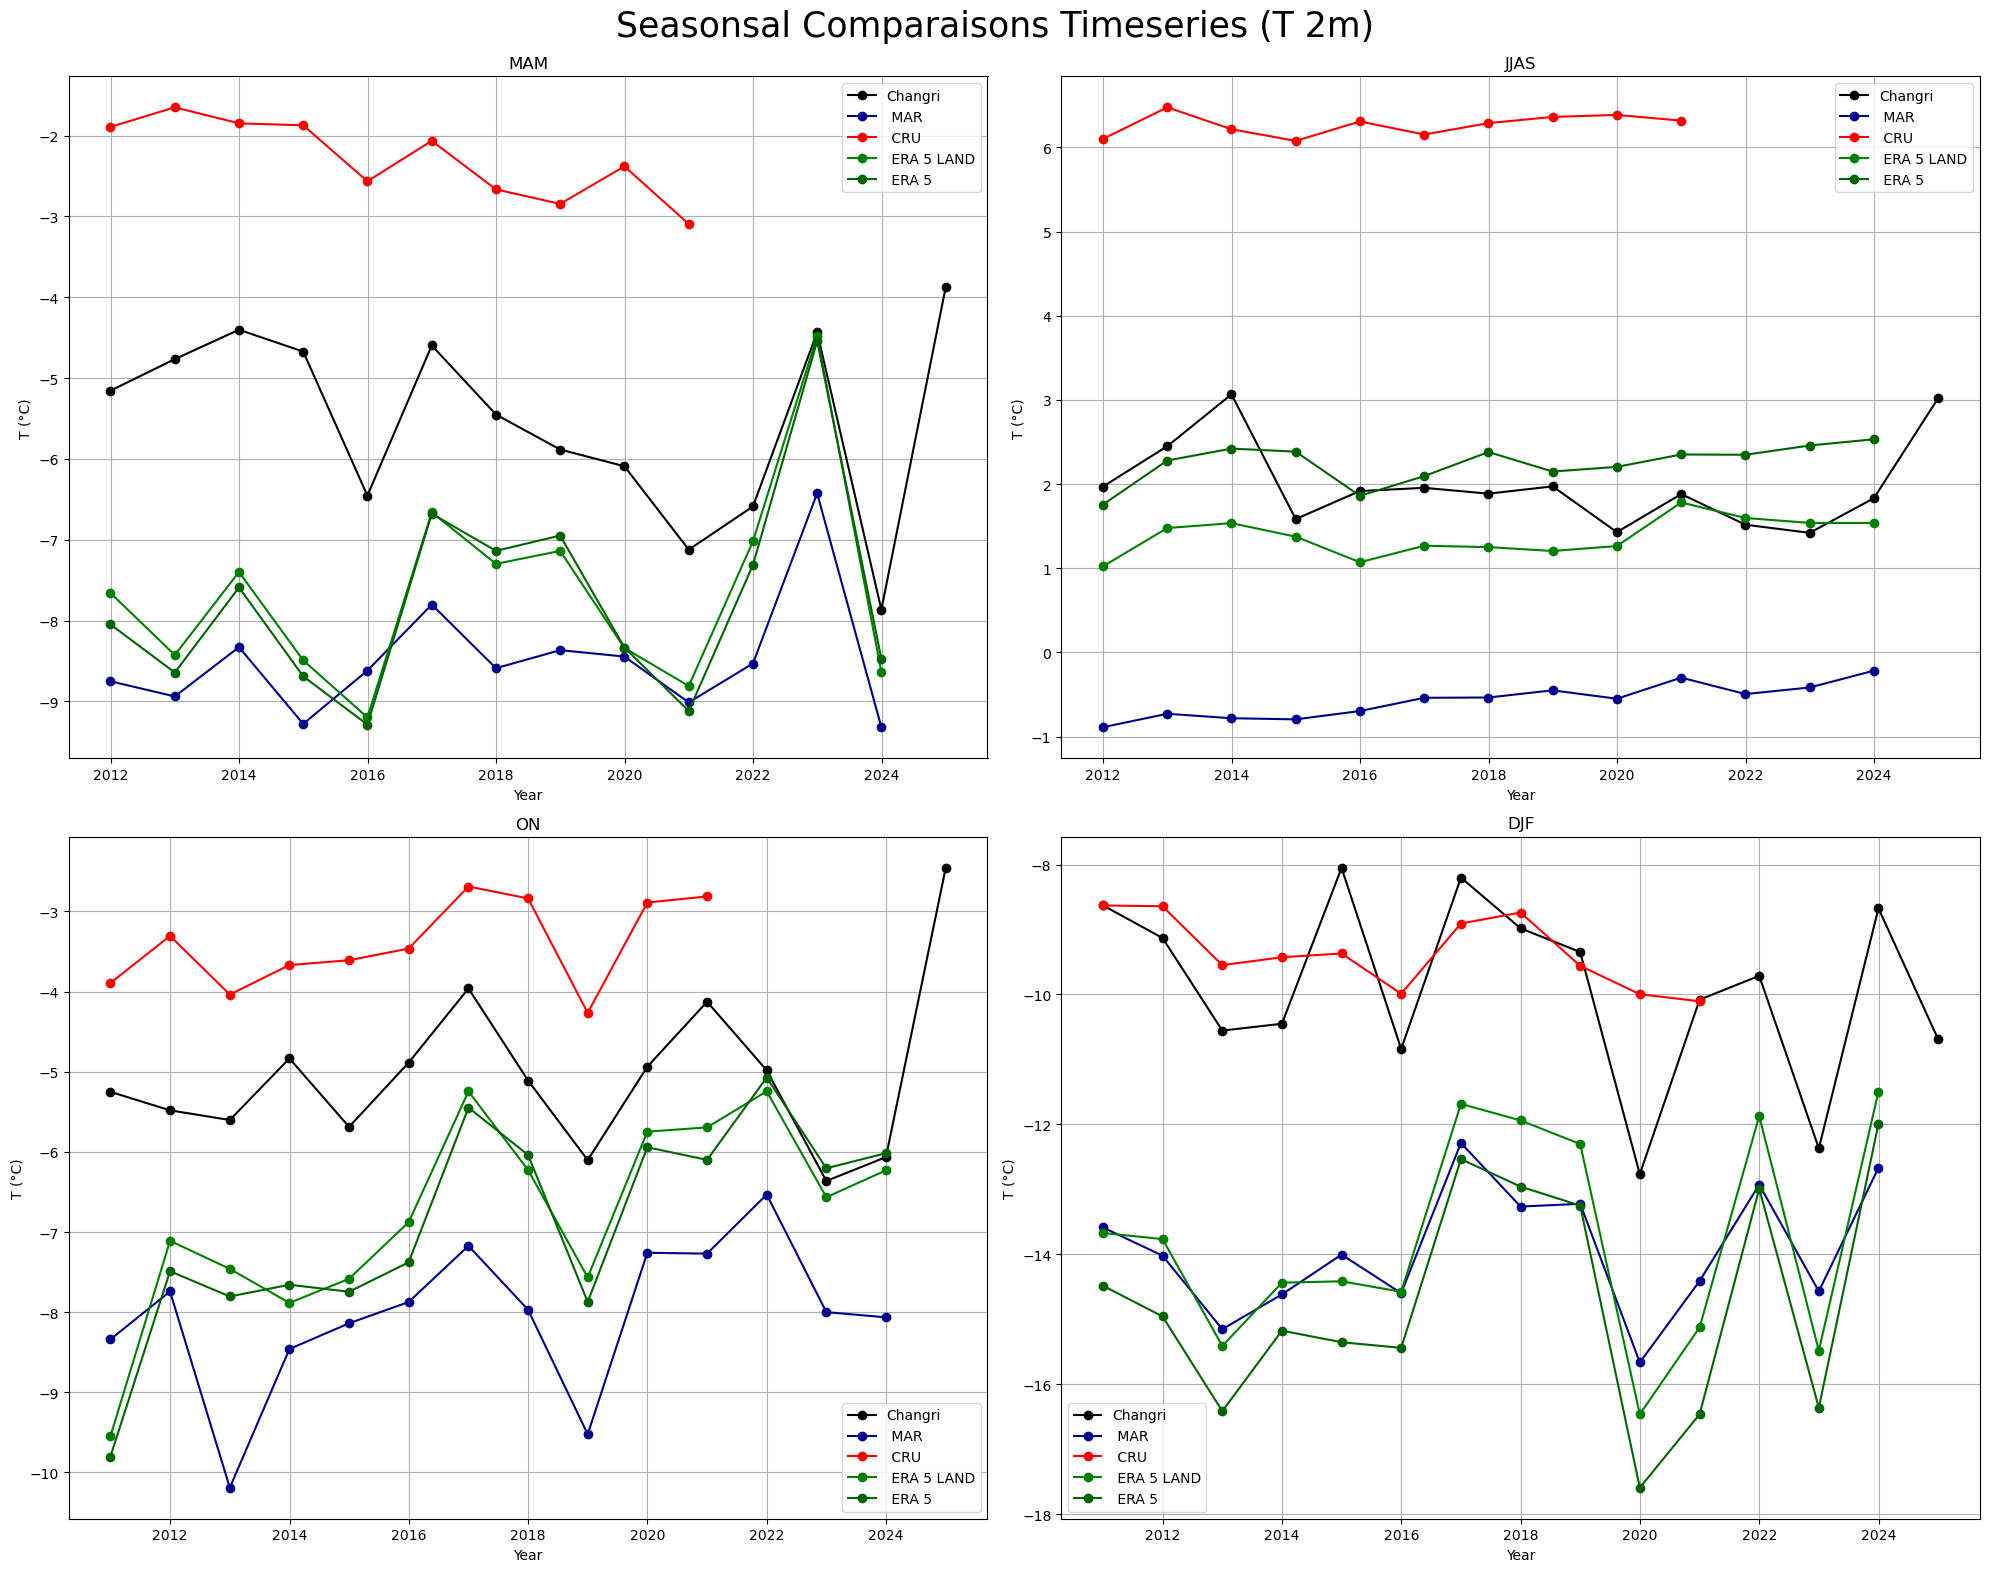

In [24]:
#Time Series
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for thing, x in enumerate(seasons):
    ax = axes[thing]

    # Station
    da_py = seasonal_T_station['Tair'][x]
    # MAR
    da_mar = seasonnal_T_MAR[x]
    #Cru
    da_cru= seasonnal_T_CRU[x]
    #ERA-5-LAND
    da_ERA_5_LAND=seasonnal_T_ERA_5_LAND[x]
    #ERA_5
    da_ERA_5=seasonnal_T_ERA_5[x]

    # Tracés
    ax.plot(da_py.time, da_py.values, linestyle='-', marker='o', label=station,color='black')
    ax.plot(da_mar.time, da_mar.values, linestyle='-', marker='o', label=' MAR',color='darkblue')
    ax.plot(da_cru.time, da_cru.values, linestyle='-', marker='o', label=' CRU',color='red')
    ax.plot(da_ERA_5_LAND.time, da_ERA_5_LAND.values, linestyle='-', marker='o', label=' ERA 5 LAND',color='green')
    ax.plot(da_ERA_5.time, da_ERA_5.values, linestyle='-', marker='o', label=' ERA 5',color='darkgreen')

    # Mise en forme
    ax.set_title(titles[x])
    ax.set_xlabel('Year')
    ax.set_ylabel('T (°C)')
    ax.grid(True)
    ax.legend()


plt.tight_layout(rect=[0, 0, 1, 0.96])  # Maria script theft : leave space for the suptitle
fig.suptitle('Seasonsal Comparaisons Timeseries (T 2m)',fontsize=25)
plt.show()


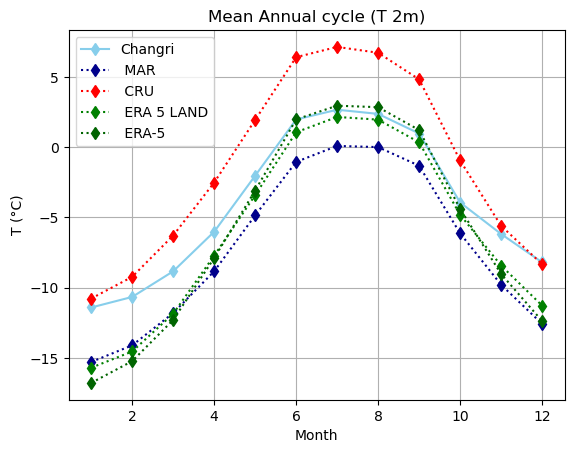

In [29]:
#Annual cycle 
#daily_meanRR=RR.resample(time='D').sum()  
T_cycle_sta=ClimBasis_T_station['monthly'].groupby('time.month').mean()


plt.plot(T_cycle_sta.month,T_cycle_sta.Tair,
        color='skyblue',linestyle='-',label=station,marker='d')
plt.plot(T_MAR_cycle.month,T_MAR_cycle.values,
         color='darkblue',linestyle=':',label=' MAR',marker='d')
plt.plot(T_CRU_Cycle.month,T_CRU_Cycle.values,
         color='red',linestyle=':',label=' CRU',marker='d')    
plt.plot(T_ERA_5_LAND_Cycle.month,T_ERA_5_LAND_Cycle.values,
         color='green',linestyle=':',label=' ERA 5 LAND',marker='d')    

plt.plot(T_ERA_5_Cycle.month,T_ERA_5_Cycle.values,
         color='darkgreen',linestyle=':',label=' ERA-5',marker='d')    






plt.legend()
plt.title('Mean Annual cycle (T 2m)')
plt.xlabel('Month')
plt.ylabel('T (°C)')

plt.grid(True)

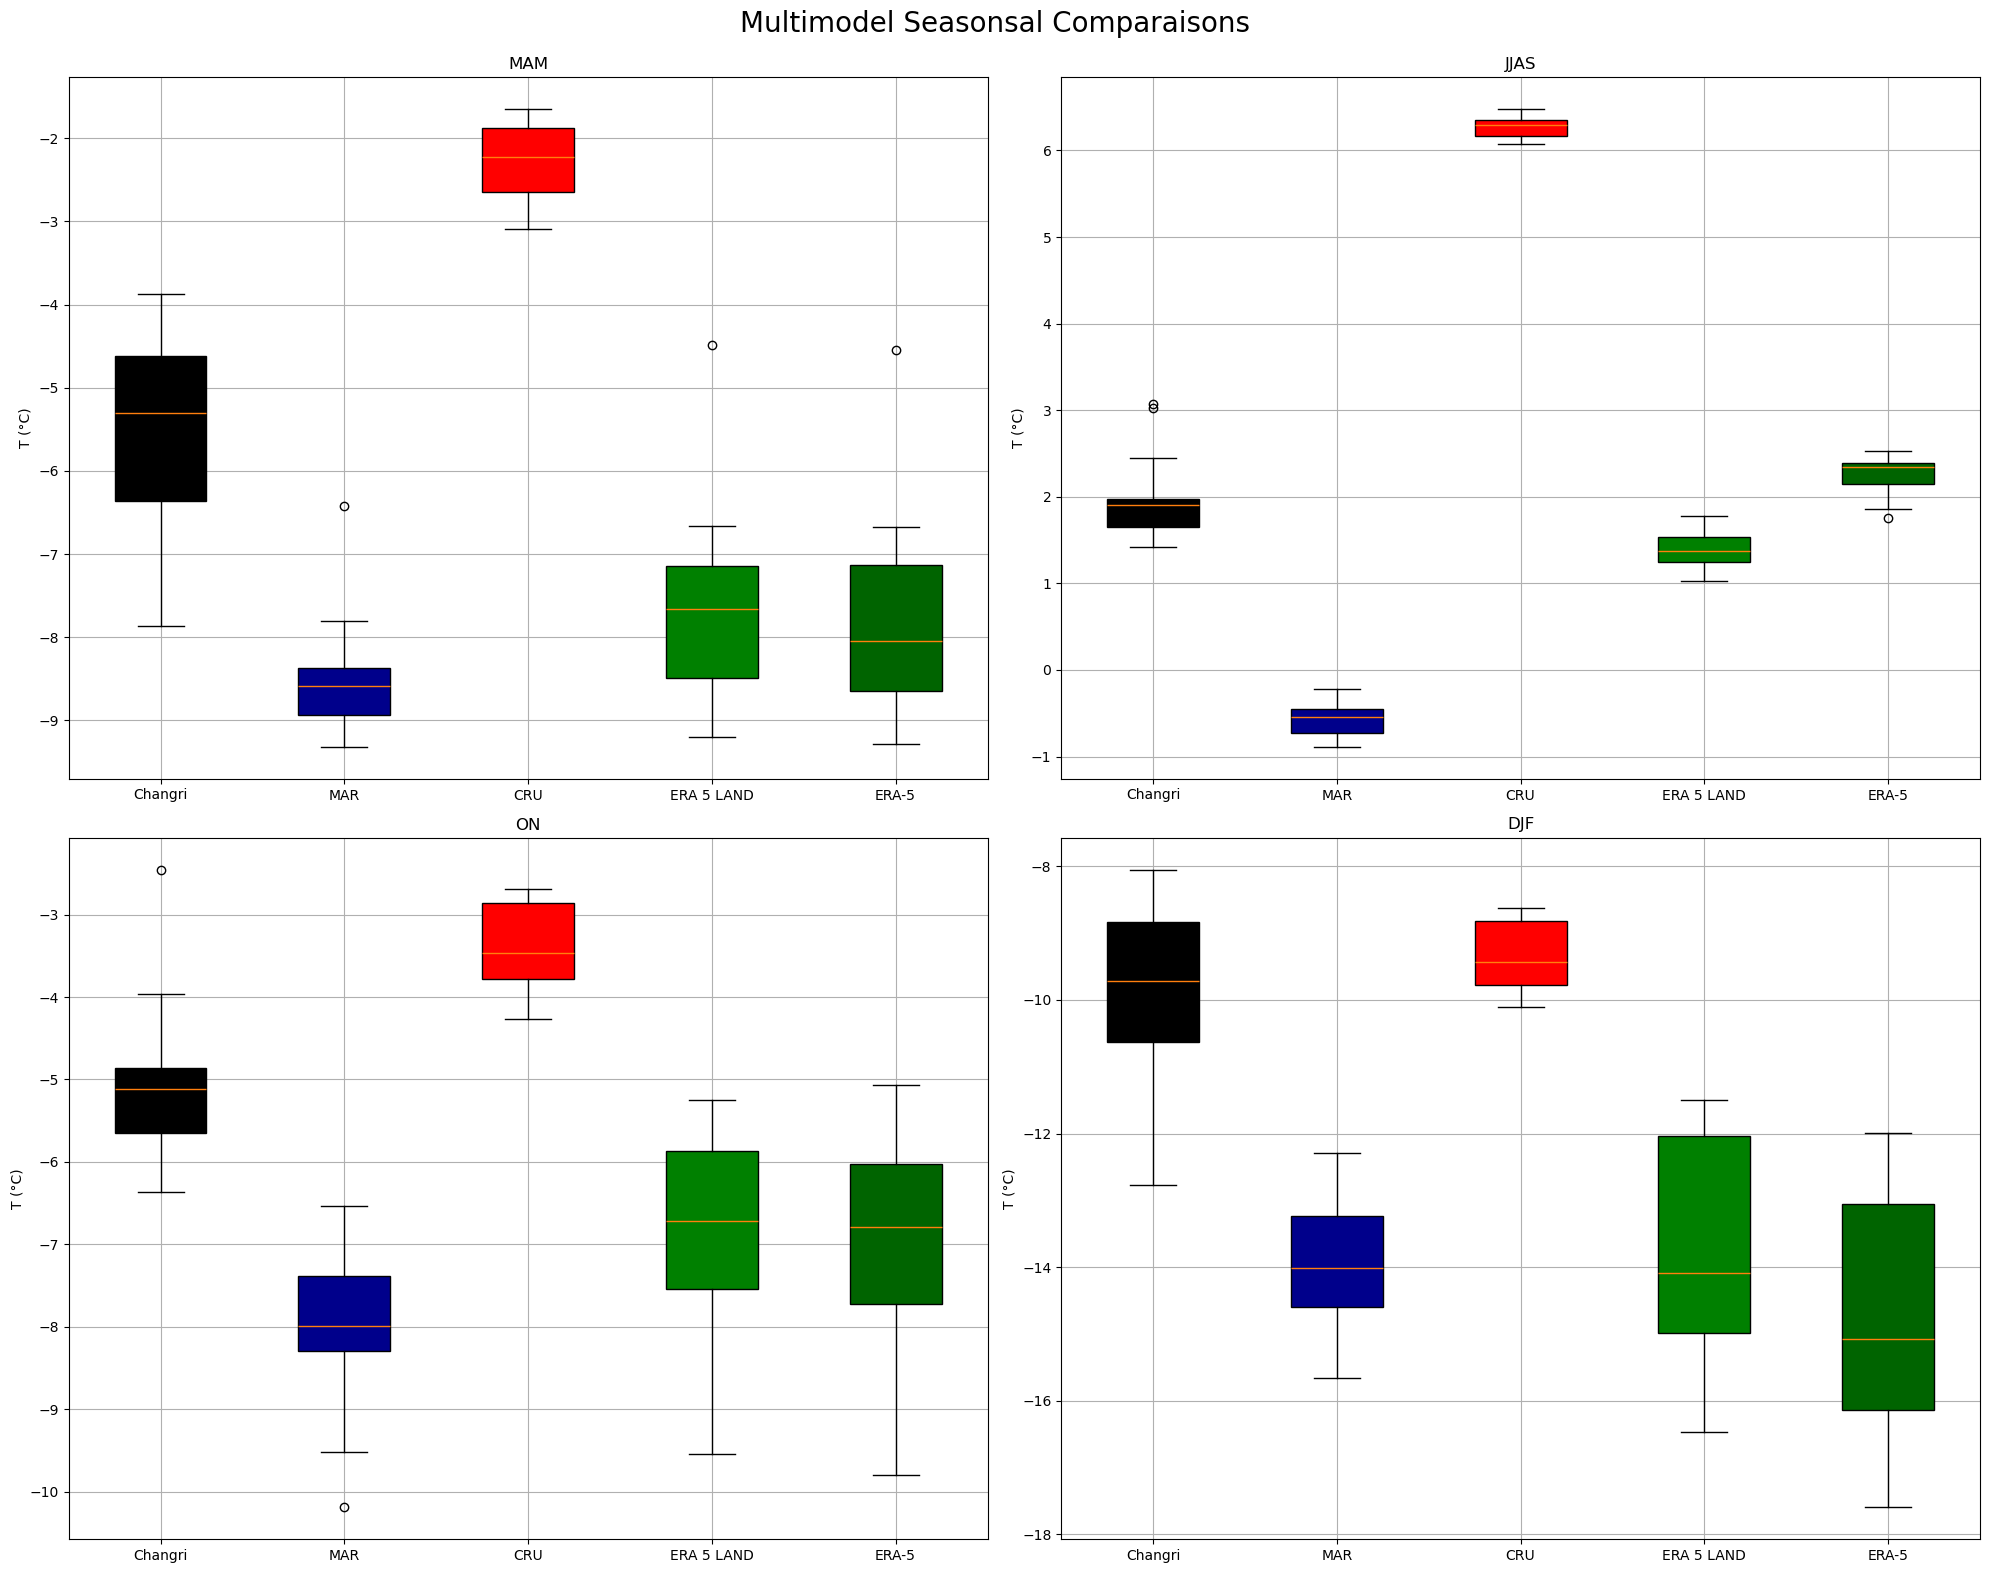

In [26]:
#
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for things, x in enumerate(seasons):
    ax = axes[things]
    ax = axes[things]
    # Pyramide
    da_py = seasonal_T_station['Tair'][x]
    # MAR
    da_mar = seasonnal_T_MAR[x]
    #Cru
    da_cru= seasonnal_T_CRU[x]
    #ERA-5-LAND
    da_ERA_5_LAND=seasonnal_T_ERA_5_LAND[x]
    #ERA_5
    da_ERA_5=seasonnal_T_ERA_5[x]
    # listes
    data = [da_py, da_mar,  da_cru,da_ERA_5_LAND,da_ERA_5]
    
    tick_labels = [station, 'MAR',  'CRU','ERA 5 LAND', 'ERA-5']
    colors = ['black', 'darkblue', 'red','green','darkgreen']

    
    bp = ax.boxplot(data, patch_artist=True, tick_labels=tick_labels)
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    ax.set_title(titles[x])
    ax.set_ylabel('T (°C)')
    ax.grid(True)
    ax.legend
plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle('Multimodel Seasonsal Comparaisons', fontsize=20)
plt.show()
